# Project 2

Author: Regina Fennessy

***

## Introduction

***

In this project I will investigate the Wisconsin Breast Cancer dataset.

## Importing Libraries

***


In [24]:
# Importing numpy and renaming it 
import numpy as np

# Importing pandas and renaming it 
import pandas as pd

# Importing seaborn and renaming it
import seaborn as sns

# Importing matplotlib and renaming it
import matplotlib.pyplot as plt

# Importing statistics and renaming it
import statistics as sts

# Importing randrange form random
from random import randrange, choice

# Importing make_classification form sklearn.datasets
from sklearn.datasets import make_classification

# Importing GridSearchCV form sklearn.model_selection
from sklearn.model_selection import GridSearchCV

## Dataset

***


The Wisconsin Breast Cancer original dataset created by Dr. William H. Wolberg. This dataset consists of 11 attributes:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)



In [25]:
# Reading in Original csv file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep='\,', names= ['ID','Clump Thickness','Uniform Cell Size','Uniform Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])

print(df)
 


C:\Users\g025067\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


          ID  Clump Thickness  Uniform Cell Size  Uniform Cell Shape  \
0    1000025                5                  1                   1   
1    1002945                5                  4                   4   
2    1015425                3                  1                   1   
3    1016277                6                  8                   8   
4    1017023                4                  1                   1   
..       ...              ...                ...                 ...   
694   776715                3                  1                   1   
695   841769                2                  1                   1   
696   888820                5                 10                  10   
697   897471                4                  8                   6   
698   897471                4                  8                   8   

     Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                    1                            2           1   
1

In [26]:
df.shape

(699, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniform Cell Size            699 non-null    int64 
 3   Uniform Cell Shape           699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [28]:
df.head()

,ID,Clump Thickness,Uniform Cell Size,Uniform Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


From the dataset we see that 458 cases are benign and 241 are malignant

In [29]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

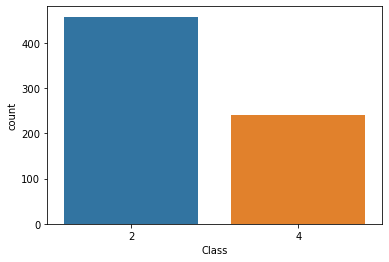

In [33]:
sns.countplot(df.Class,label="count")
plt.show()

Below gives a summary of the dataset that includes the count,mean and std

In [16]:
df.describe()

,ID,Clump Thickness,Uniform Cell Size,Uniform Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## References

***

- https://www.w3schools.com/python/pandas/pandas_intro.asp
- https://www.w3schools.com/python/numpy/numpy_intro.asp
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
- https://www.kaggle.com/code/patrickjellison/classification-models-with-pca-reduction